In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-science-bowl-2019/sample_submission.csv
/kaggle/input/data-science-bowl-2019/specs.csv
/kaggle/input/data-science-bowl-2019/train_labels.csv
/kaggle/input/data-science-bowl-2019/test.csv
/kaggle/input/data-science-bowl-2019/train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Data

In [3]:
root = '/kaggle/input/data-science-bowl-2019/'

print('Reading train.csv file ...', end='')
train = pd.read_csv(root + 'train.csv')  # training data
print(' Done!')

print('Reading train_labels.csv file ...', end='')
train_labels = pd.read_csv(root + 'train_labels.csv') 
print(' Done!')

print('Reading test.csv file ...', end='')
test = pd.read_csv(root + 'test.csv')
print(' Done!')

print('Reading specs.csv file ...', end='')
specs = pd.read_csv(root + 'specs.csv')
print(' Done!')

Reading train.csv file ... Done!
Reading train_labels.csv file ... Done!
Reading test.csv file ... Done!
Reading specs.csv file ... Done!


What does the data look like ?

In [4]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [5]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [6]:
pd.set_option('max_colwidth', 150)
specs.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
1,df4fe8b6,The end of system-initiated feedback (Incorrect) event occurs when the game finishes delivering feedback to the player in response to an incorrect...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""description"",""type"":""string"",""info"":""the text or descri..."
2,3babcb9b,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
3,7f0836bf,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
4,ab3136ba,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."


Is there missing data ?

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(train)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,int64,int64,int64,object,object,object


In [9]:
missing_data(train_labels)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0
Types,object,object,object,int64,int64,float64,int64


In [10]:
missing_data(test)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,int64,int64,int64,object,object,object


Children can select different type of activities between watching videos clips, playing games, doing an activity or taking an assessment. How are those categories present ?

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

train_types = train["type"].value_counts()
test_types = test["type"].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(values=train_types, labels=train_types.index.tolist(), name="Train" , hole=.3),
    1, 1)

fig.add_trace(
    go.Pie(values=test_types, labels=test_types.index.tolist(), name="Test" , hole=.3),
    1, 2)

fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=17, textposition="inside",
                  marker=dict(colors=['gold', 'mediumturquoise', 'darkorange', 'plum'],  
                              line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Media Type of The Game or Video",
    height=500, width=800,
    annotations=[dict(text='Train', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Test', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [32]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20] , palette=sns.color_palette())
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

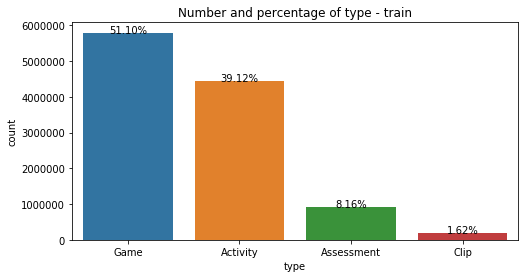

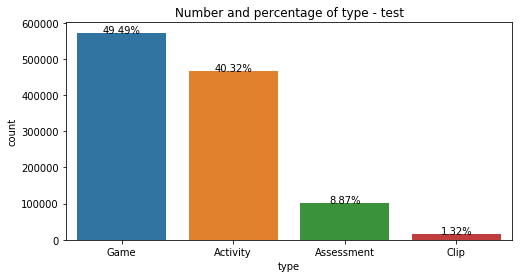

In [37]:
plot_count('type', 'type - train', train, size=2)
plot_count('type', 'type - test', test, size=2)

La majorité des actions effectuées par les enfants sont des jeux ou des activités. Très peu de vidéos sont visionnées, apportent-elles beaucoup d'information au vue de leur présence réduite ?
On remarque également que peu s'assessment sont tentés, certains individus n'en réalisent même aucun. Il ne faudra pas oublier d'enlever ces derniers lors de la phase d'apprentissage, car ils n'apportent aucune information sur la réussite ou l'échec d'un assessment.

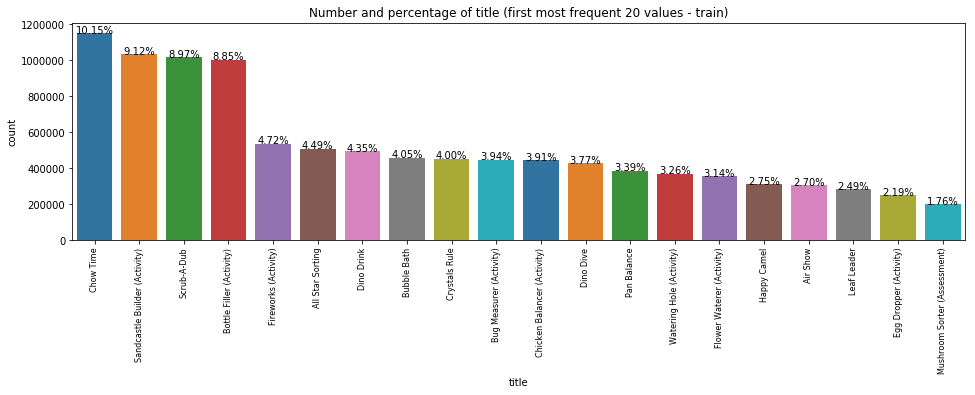

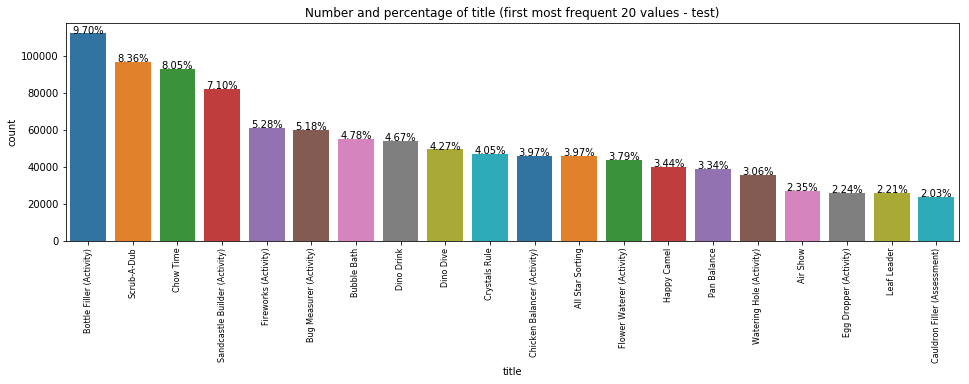

In [38]:
plot_count('title', 'title (first most frequent 20 values - train)', train, size=4)
plot_count('title', 'title (first most frequent 20 values - test)', test, size=4)

On remarque que environ 40% des jeux et activités effectuées par les enfants sont communes (car même titre). En revanche, le reste des titres est moins représenté et leur apparition est propre aux choix de niveau effectués par l'enfant.

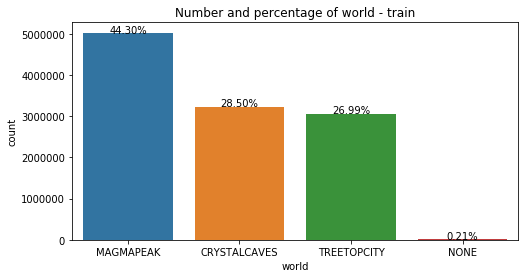

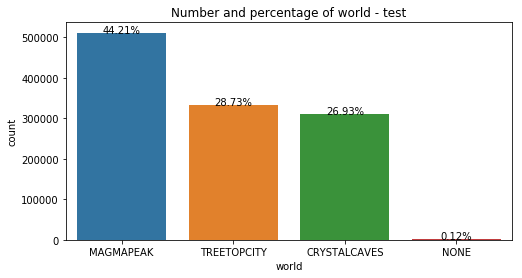

In [39]:
plot_count('world', 'world - train', train, size = 2)
plot_count('world', 'world - test', test, size = 2)

Près d'un jeu/activité sur 2 se passe dans le monde 'Magmapeak'.
Un faible pourcentage ne possède pas de monde, à voir a quoi ces étapes correspondent.

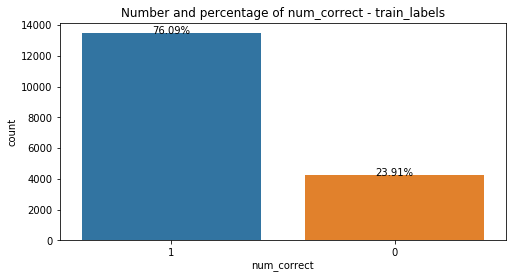

In [46]:
plot_count('num_correct', 'num_correct - train_labels', train_labels, size = 2)

Il y a au maximum 1 num_correct par game_session.

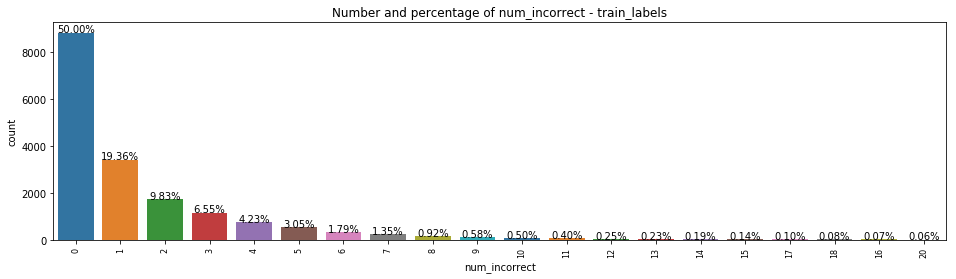

In [47]:
plot_count('num_incorrect', 'num_incorrect - train_labels', train_labels, size = 4)

num_incorrect peut, lui, être beaucoup important mais en général un enfant réussi ou abandonne un assessment au bout de 0,1 ou 2 échecs. Même si certains "s'acharnent".
Il peut être intéressant de classer leur enfant selon leur profil, vont-ils réussir rapidement, au bout de 1 ou 2 erreurs, abandonner dès le premier echec ou au contraire s'archarner jusqu'a réussir.

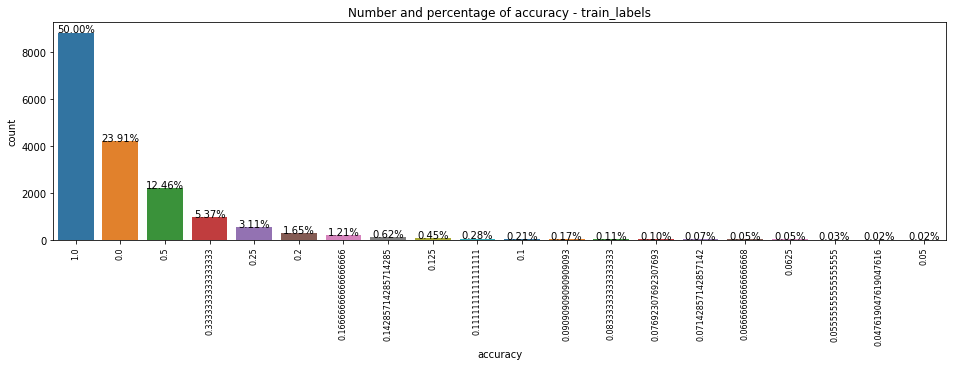

In [44]:
plot_count('accuracy', 'accuracy - train_labels', train_labels, size=4)

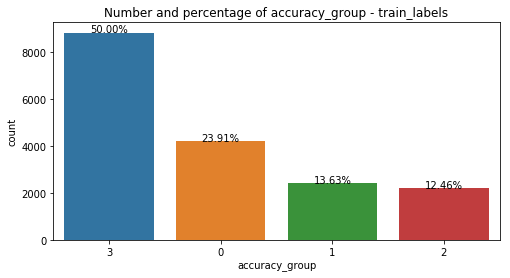

In [45]:
plot_count('accuracy_group', 'accuracy_group - train_labels', train_labels, size=2)

Dans le jeu de train, un test sur deux est réussi du premier coup alors que près d'un assessment sur 4 n'est jamais réussi.